In [9]:
from model import ResNet, block

def ResNet18(img_channel=3, num_classes=1000):
    return ResNet(block, [2, 2, 2, 2], img_channel, num_classes)
model18 = ResNet18()

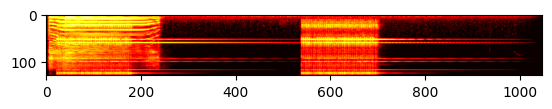

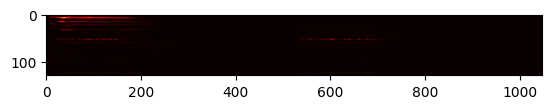

In [8]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt
npy = np.load('/home/tonypeng/Workspace1/Hearing/SemanticHearing/AP/data_folder/mix_data_1/npy_log/train/329502_20069.npy')
plt.imshow(npy, cmap='hot')
plt.show()
npy = np.load('/home/tonypeng/Workspace1/Hearing/SemanticHearing/AP/data_folder/mix_data_1/npy/train/329502_20069.npy')
plt.imshow(npy, cmap='hot')
plt.show()

In [30]:
# make a dataloader
# https://zhuanlan.zhihu.com/p/346553758
import torch
# import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import pandas as pd

def load_spec(ttv):
    # get spec 
    # to be fast, we can use pickle instead of npy
    # to be fast, we can use jams instead of wav
    # wav_folder = '/home/tonypeng/Workspace1/Hearing/SemanticHearing/AP/data_folder/mix_data_1/' + ttv + '/'
    # npy_folder = '/home/tonypeng/Workspace1/Hearing/SemanticHearing/AP/data_folder/mix_data_1/npy/' + ttv + '/'
    npy_folder = '/home/tonypeng/Workspace1/Hearing/SemanticHearing/AP/data_folder/mix_data_1/npy_log/' + ttv + '/'

    # record is in , we can use pickle as well
    record = pd.read_csv('/home/tonypeng/Workspace1/Hearing/SemanticHearing/AP/data_folder/mix_data_1/df_dev_mix_no_share_small.csv')

    # newfname,fname1,fname2,labels,gt_label,gt_index
    # return newspec, gtspec, gt_label
    newnpys = []
    gtnpys = []
    gt_labels = []
    for i in range(record['newfname'].shape[0]):
        newnpy = np.load(npy_folder + record['newfname'][i] + '.npy')
        if record['gt_index'] == 0:
            gtnpy = np.load(npy_folder + record['fname1'][i] + '.npy')
            
        else:
            gtnpy = np.load(npy_folder + record['fname2'][i] + '.npy')
        # npys are from 0 -> 1, we need to change it to 0 -> 255
        gtnpy = gtnpy * 255
        newnpy = newnpy * 255
        # change the type to uiint8
        gtnpy = gtnpy.astype(np.uint8)
        newnpy = newnpy.astype(np.uint8)
        gt_label = record['gt_label'][i]
        newnpys.append(newnpy)
        gtnpys.append(gtnpy)
        gt_labels.append(gt_label)
    return newnpys, gtnpys, gt_labels
        
class mix_data_1():
    # __init__ is the constructor
    def __init__(self, ttv, resize=False):
        super(mix_data_1, self).__init__()
        self.newnpys, self.gtnpys, self.gt_labels = load_spec(ttv)

        self.resize = resize # size here is 640*480, width = 640, height = 480
        if self.resize == True:
            # 
            self.newnpys = [cv2.resize(npy, (224, 224)) for npy in self.newnpys]
            self.gtnpys = [cv2.resize(npy, (224, 224)) for npy in self.gtnpys]

    def __len__(self):
        return len(self.newnpys)

    def __getitem__(self, idx):
        newnpy = self.newnpys[idx]
        gtnpy = self.gtnpys[idx]
        gt_label = self.gt_labels[idx]

        # change the type to float32
        newnpy = newnpy.astype(np.float32)
        gtnpy = gtnpy.astype(np.float32)

        # change the type to tensor
        newnpy = torch.from_numpy(newnpy)
        gtnpy = torch.from_numpy(gtnpy)

        # tensor, tensor, int
        return newnpy, gtnpy, gt_label
    
load_spec('train')


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().